# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL                                                                                                             ** Openweather website info **
url = "https://api.openweathermap.org/data/2.5/weather?q={city_data}&units={units}&appid={weather_api_key}"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city                                                                                   ** had chatgpt explain the open_weather_dataframe_solution version of this and it gave a simpler version
    city_url = url.format(city_data=city, units=units, weather_api_key=weather_api_key)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()                                                                                      #   ** open_weather_dataframe_solution version

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date                                        ** JSON format API response fields from OpenWeather and  open_weather_dataframe_solution
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | challapata
Processing Record 2 of Set 1 | vila velha
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | jumla
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | vadso
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | tabou
Processing Record 9 of Set 1 | san julian
Processing Record 10 of Set 1 | ballina
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | mermoz boabab
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | manokwari
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | blackman

In [4]:
# Convert the cities weather data into a Pandas DataFrame                                                                             ** open_weather_dataframe_solution **
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,challapata,-18.9000,-66.7667,56.55,40,46,5.32,BO,1730682644
1,vila velha,-20.3297,-40.2925,76.95,91,20,4.61,BR,1730682412
2,margaret river,-33.9500,115.0667,61.66,58,27,7.40,AU,1730682646
3,jumla,29.2747,82.1838,43.75,85,9,4.63,NP,1730682647
4,olonkinbyen,70.9221,-8.7187,31.78,100,100,16.55,SJ,1730682649


In [6]:
print("Current Working Directory:", os.getcwd())                                                                                          ## Accidently put my output_data file outside of WeatherPy and created many issues

Current Working Directory: C:\Users\riley\OneDrive\Documents\School Challenges\Module 6 Challenge\Starter_Code\WeatherPy


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,challapata,-18.9000,-66.7667,56.55,40,46,5.32,BO,1730682644
1,vila velha,-20.3297,-40.2925,76.95,91,20,4.61,BR,1730682412
2,margaret river,-33.9500,115.0667,61.66,58,27,7.40,AU,1730682646
3,jumla,29.2747,82.1838,43.75,85,9,4.63,NP,1730682647
4,olonkinbyen,70.9221,-8.7187,31.78,100,100,16.55,SJ,1730682649


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

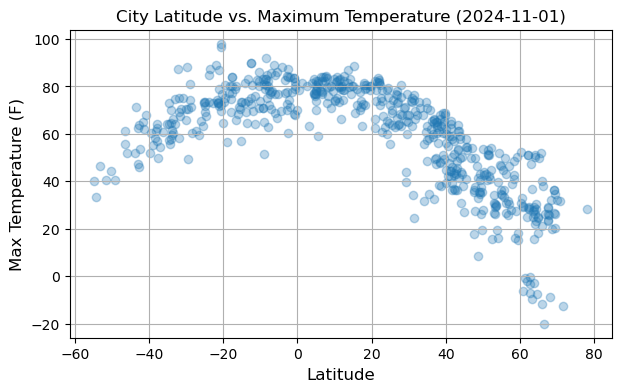

In [9]:
# Build scatter plot for latitude vs. temperature                                                                                                   ## open_weather_dataframe_solution
plt.figure(figsize=(7, 4))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', alpha=0.3)

# Incorporate the other graph properties
plt.title("City Latitude vs. Maximum Temperature (2024-11-01)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

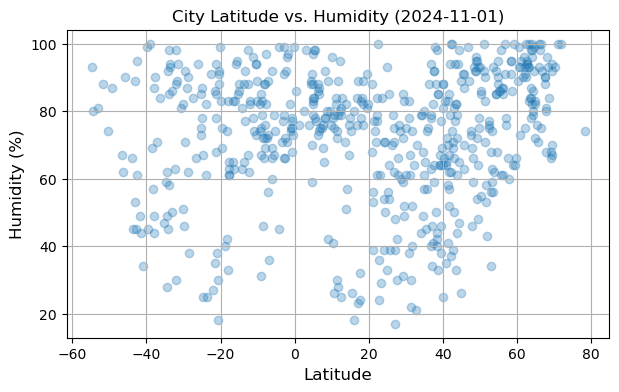

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(7, 4))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', alpha=0.3)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-11-01)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

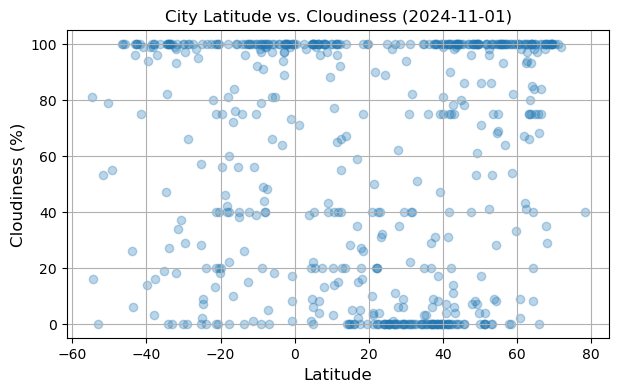

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(7, 4))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', alpha=0.3)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-11-01)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

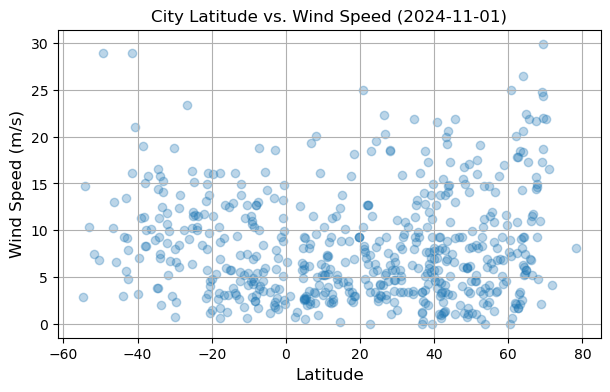

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(7, 4))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', alpha=0.3)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-11-01)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots                                            #  weather_stats_solution but I don't like it or quite understand it so I used GPT to create a different way
                                                                                                 # solution: fit_line = slope * x_data + intercept and it kept erroring since it was seperate so GPT came up with this as a solution
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      74.977864
1      75.576444
2      81.278925
3      54.808312
4      37.371579
         ...    
565    75.459340
566    70.735679
567    51.594310
568    49.954066
569    64.958380
Name: Lat, Length: 570, dtype: float64


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,jumla,29.2747,82.1838,43.75,85,9,4.63,NP,1730682647
4,olonkinbyen,70.9221,-8.7187,31.78,100,100,16.55,SJ,1730682649
5,vadso,70.0744,29.7487,32.16,93,100,21.85,NO,1730682650
7,tabou,4.4230,-7.3528,77.38,88,20,5.70,CI,1730682653
8,san julian,21.0167,-102.1667,62.35,39,4,8.32,MX,1730682654


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,challapata,-18.9000,-66.7667,56.55,40,46,5.32,BO,1730682644
1,vila velha,-20.3297,-40.2925,76.95,91,20,4.61,BR,1730682412
2,margaret river,-33.9500,115.0667,61.66,58,27,7.40,AU,1730682646
6,ushuaia,-54.8000,-68.3000,40.30,93,81,2.82,AR,1730682651
9,ballina,-28.8667,153.5667,81.12,62,100,12.41,AU,1730682429


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7273567589049926


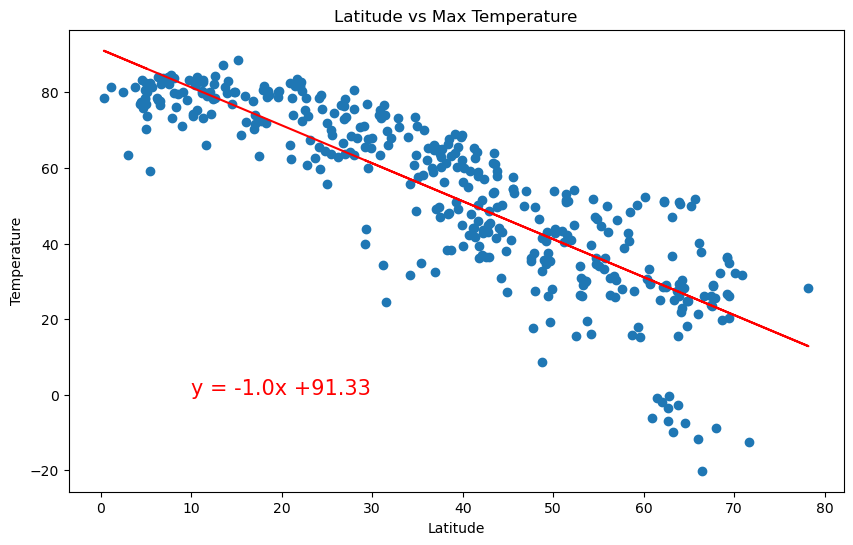

In [23]:
# Linear regression on Northern Hemisphere                                                                                ## banking_deserts_solution used                                
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temperature")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.4473339752874619


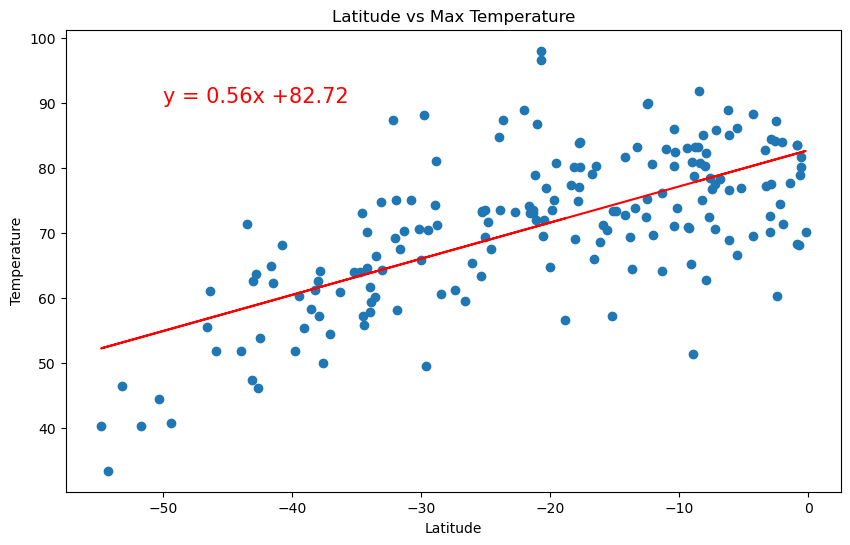

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temperature")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship: With an rvalue of 0.727 the relationship between latitude and temperature in the northern hemisphere is strong. However although it looks good on the scatter plot the rvalue for lat and temp in the southern hemisphere is 
                                          0.447 which means it is weaker.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.05449846706919566


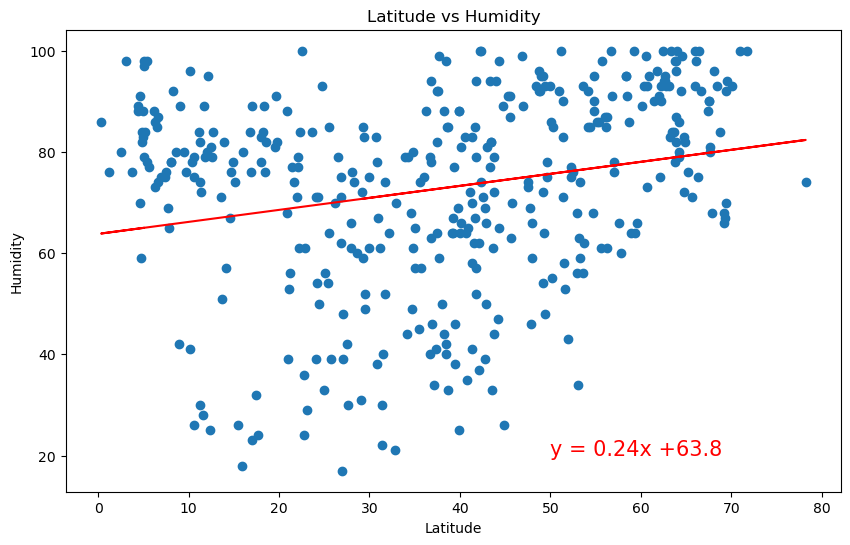

In [39]:
# Linear regression on Northern Hemisphere                                                                                ## banking_deserts_solution used                                
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.018141811280319137


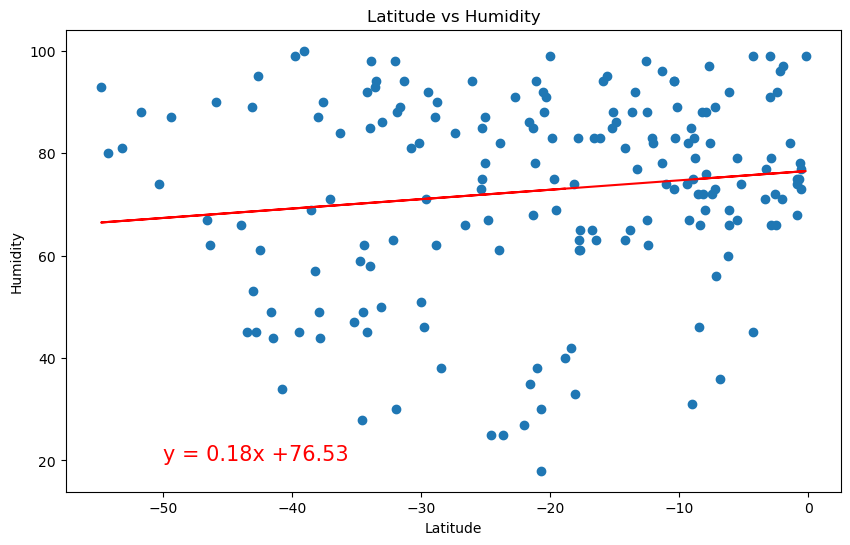

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship: The is close to no relationship between latitude and humidity in both the northern and southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.06662795181450169


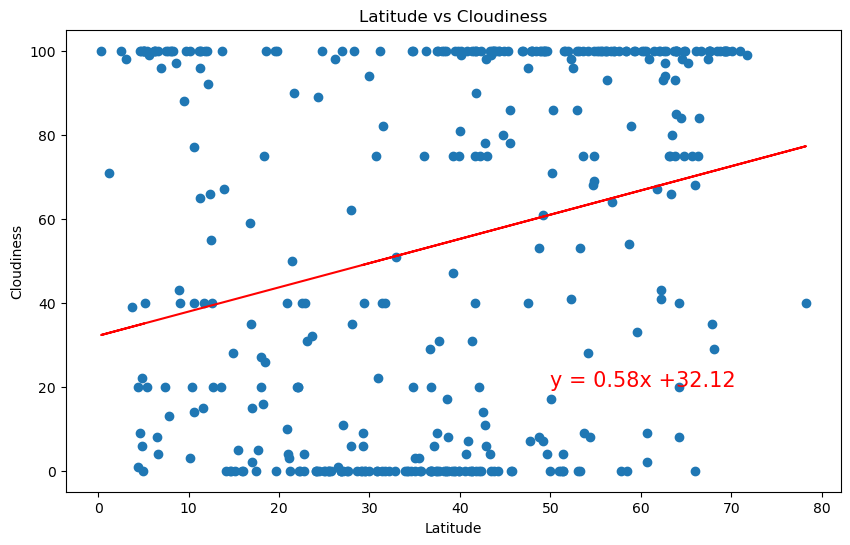

In [41]:
# Linear regression on Northern Hemisphere                                                                                ## banking_deserts_solution used                                
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.004717101772316304


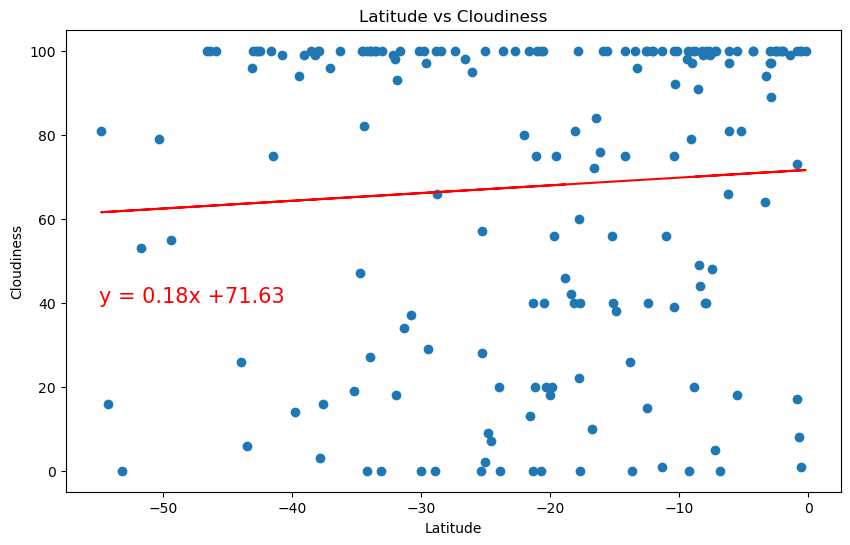

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship: Although there almost no relationship beween latitude and cloudiness the northern hemisphere's value of 0.066 is signiciantly stronger than the southen hemispheres 0.004.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.06023113824411539


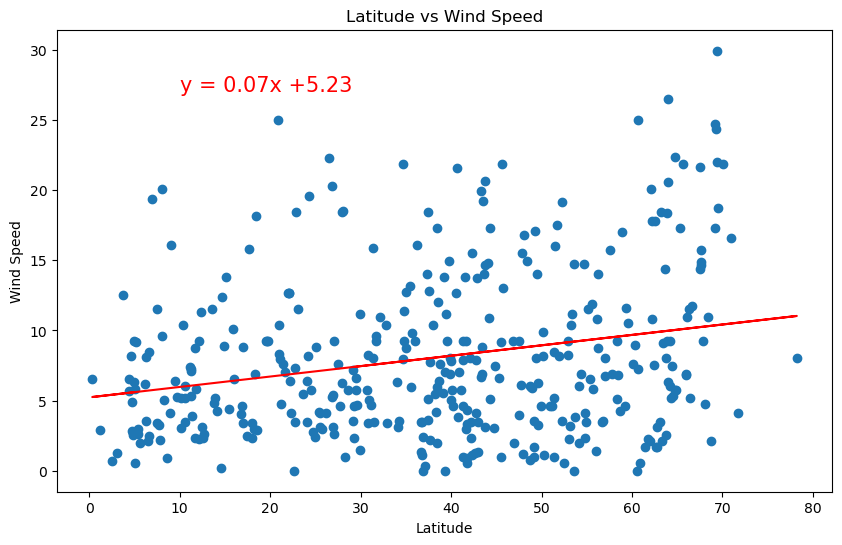

In [43]:
# Linear regression on Northern Hemisphere                                                                                ## banking_deserts_solution used                                
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,27),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

The r^2-value is: 0.07879963502922305


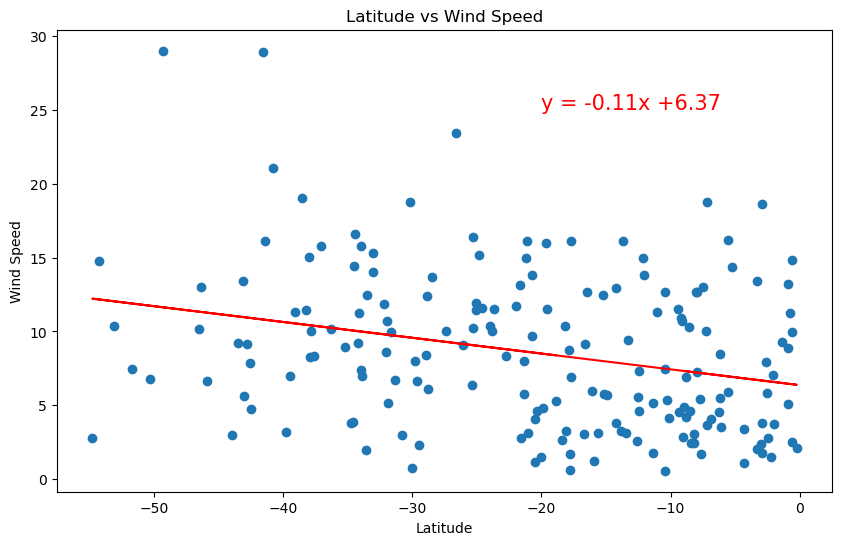

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-20,25),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

# Show plot
plt.show()

Discussion about the linear relationship: There is almost no relationship between latitude and wind speed in both the northern and southern hemisphere.